In [2]:
import json
import os
from math import atan2

import cv2
import random

import numpy as np
import torch
import torchvision
from IPython.display import clear_output
from matplotlib import pyplot as plt
from torchvision.datasets import FashionMNIST

Text(0.5, 1.0, 'Image label: 3')

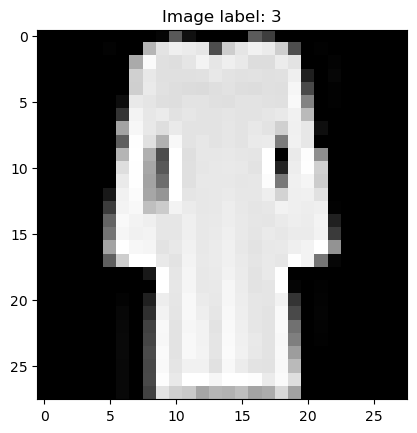

In [4]:
train_fmnist_data = FashionMNIST(".", train=True, transform=torchvision.transforms.ToTensor(), download=True)

train_data_loader = torch.utils.data.DataLoader(
    train_fmnist_data,
    batch_size=128,
    shuffle=True,
    num_workers=6
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]

plt.figure()
plt.imshow(_image.reshape(28, 28), cmap='gray')
plt.title(f"Image label: {_label}")

In [36]:
import numpy as np

def compute_sobel_gradients_two_loops(image):
    height, width = image.shape
    
    # initialize image with paddings
    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant', constant_values=0)
    
    # initialize gradient matrix with zeros
    gradient_x = np.zeros_like(image, dtype=np.float64)
    gradient_y = np.zeros_like(image, dtype=np.float64)
    
    # initialize sobel matrix
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float64)
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float64)
    
    # calculate gradients 
    for i in range(1, height + 1):
        for j in range(1, width + 1):
            gradient_x[i - 1][j - 1] = np.sum(padded_image[i - 1: i + 2, j - 1: j + 2] * sobel_x)
            gradient_y[i - 1][j - 1] = np.sum(padded_image[i - 1: i + 2, j - 1: j + 2] * sobel_y)
  
    return gradient_x, gradient_y

In [37]:
def compute_sobel_gradients_opencv(image):
    # Apply Sobel filter for horizontal and vertical gradients
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Return gradients in both directions
    return sobel_x, sobel_y

In [38]:
image = train_fmnist_data[7][0][0].numpy()
gradients_two_loops = compute_sobel_gradients_two_loops(image)
gradients_opencv = compute_sobel_gradients_opencv(image)

assert np.allclose(gradients_two_loops[0][1:-1, 1:-1], gradients_opencv[0][1:-1, 1:-1], atol=1e-2), "gradients_two_loops[0] and gradients_opencv[0] are not close"
assert np.allclose(gradients_two_loops[1][1:-1, 1:-1], gradients_opencv[1][1:-1, 1:-1], atol=1e-2), "gradients_two_loops[1] and gradients_opencv[1] are not close"
print("Everything seems fine!")

Everything seems fine!


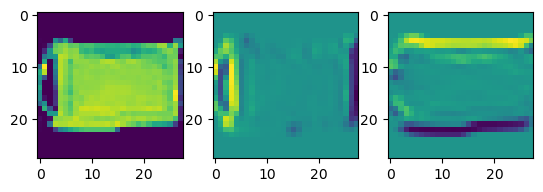

In [39]:
image = random.choice(train_fmnist_data)[0][0].numpy()
gradients_two_loops = compute_sobel_gradients_two_loops(image)

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(gradients_two_loops[0])
plt.subplot(1, 3, 3)
plt.imshow(gradients_two_loops[1])

In [103]:
import math

def compute_gradient_magnitude(sobel_x, sobel_y):
    gradient = np.zeros_like(sobel_x, dtype=np.float64)
    
    for i in range(sobel_x.shape[0]):
        for j in range(sobel_x.shape[1]):
            gradient[i, j] = math.sqrt(sobel_x[i, j] ** 2 +  sobel_y[i, j] ** 2)
    
    return gradient

def compute_gradient_direction(sobel_x, sobel_y):
    gradient = np.zeros_like(sobel_x, dtype=np.float64)
    
    for i in range(sobel_x.shape[0]):
        for j in range(sobel_x.shape[1]):
            gradient[i][j] = math.degrees(math.atan2(sobel_y[i, j], sobel_x[i, j]))
    
    return gradient

In [104]:
image = train_fmnist_data[7][0][0].numpy()
gradients_two_loops = compute_sobel_gradients_two_loops(image)

magnitudes = compute_gradient_magnitude(gradients_two_loops[0], gradients_two_loops[1])
angles = compute_gradient_direction(gradients_two_loops[0], gradients_two_loops[1])
assert np.all(magnitudes >= 0), "Magnitudes should be non-negative"
assert np.all(angles > -180) and np.all(angles <= 180), "Angles should be in the range (-180, 180]"
print("Everything seems fine!")

Everything seems fine!


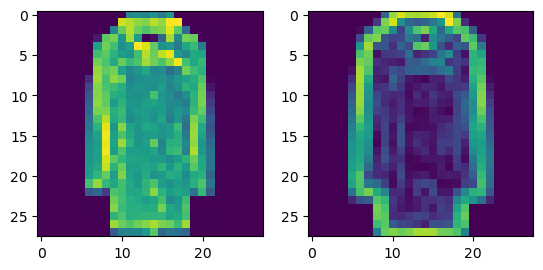

In [105]:
image = random.choice(train_fmnist_data)[0][0].numpy()
magnitudes = compute_gradient_magnitude(*compute_sobel_gradients_two_loops(image))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(magnitudes)

In [106]:
magnitudes

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00784314, 0.        , 1.30885254,
        3.28589545, 3.66280811, 3.38170216, 3.35777891, 3.43959355,
        3.56705419, 3.87921047, 3.62317717, 1.41421356, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00554594, 0.6378067 , 3.11237688,
        3.60895554, 1.94959951, 1.31737863, 1.11732368, 1.23982361,
        1.55983809, 2.01336554, 3.85599293, 3.10662006, 0.49358828,
        0.00554594, 0.00784314, 0.00554594, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.09428091, 1.15740103, 2.86862147, 2.96429614,
        1.83171262, 0.75914515, 1.92796053, 2.81753177, 3.08316112,
        2.35864666, 1.2933

In [107]:
angles

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.65650512e+01,  6.34349488e+01,
         1.53434949e+02,  4.71210965e+01,  5.53048465e+01,
         6.77638239e+01,  7.35385975e+01,  8.60196318e+01,
         9.70420392e+01,  9.31424958e+01,  9.00000000e+01,
         8.62977869e+01,  8.06747704e+01,  9.41462645e+01,
         1.09902733e+02,  1.17818799e+02,  1.35000000e+02,
         0.00000000e+00,  4.50000000e+01,  9.00000000e+01,
         1.35000000e+02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.50000000e+01,  3.09637565e+01, -1.35000000e+02,
         4.52836402e+01,  6.54638453e+01,  7.25528118e+01,
         6.68014095e+01,  7.15650512e+01,  8.61374845e+01,
         9.50921151e+01,  9.40713628e+01,  8.94011113e+01,
         8.55410045e+01,  8.42822168e+01,  9.37313971e+01,
         1.11597672e+02,  1.17266597e+02,  1.09249526e+02,
         1.12482430e+02,  1.34

In [108]:
cell_size = 7

def compute_hog(image, pixels_per_cell=(cell_size, cell_size), bins=9):
    # convert to grey colors
    if len(image.shape) == 3:
        image = np.mean(image, axis=2)
    
    # get gradient, magnitudes and directions of image
    gradient_x, gradient_y = compute_sobel_gradients_two_loops(image)
    magnitudes = compute_gradient_magnitude(gradient_x, gradient_y)
    directions = compute_gradient_direction(gradient_x, gradient_y)
    
    # get cells
    cell_height, cell_width = pixels_per_cell
    n_cells_x = image.shape[0] // cell_width
    n_cells_y = image.shape[1] // cell_height
    
    histogram = np.zeros((n_cells_x, n_cells_y, bins))
    
    for i in range(n_cells_y):
        for j in range(n_cells_x):
            cells_mag = magnitudes[i * cell_height : (i + 1) * cell_height, j * cell_width : (j + 1) * cell_width]
            cells_dir = directions[i * cell_height : (i + 1) * cell_height, j * cell_width : (j + 1) * cell_width]
            
            cells_hist, _ = np.histogram(cells_dir, bins=bins, range=(-180,180), weights=cells_mag)
            
            if np.sum(cells_hist) > 0:
                cells_hist = cells_hist / np.sum(cells_hist)

            histogram[i, j, :] = cells_hist
    
    return histogram

In [110]:
image = random.choice(train_fmnist_data)[0][0].numpy()

hog = compute_hog(image)
assert hog.shape == (4, 4, 9), "hog should have shape (4, 4, 9) for the FashionMNIST image with default parameters"
print("Everything seems fine!")

assert os.path.exists("hog_data.npy") and os.path.exists("image_data.npy"), "hog_data.npy and image_data.npy should be in the same directory as the notebook"
with open("hog_data.npy", "rb") as f:
    hog_data = np.load(f, allow_pickle=True)
with open("image_data.npy", "rb") as f:
    image_data = np.load(f, allow_pickle=True)
for test_image, test_hog in zip(image_data, hog_data):
    hog = compute_hog(test_image)
    assert np.allclose(hog, test_hog), "hog should be the same"

Everything seems fine!


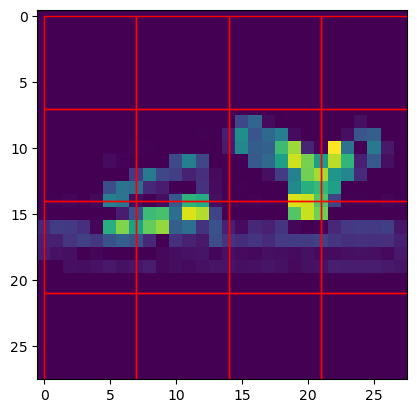

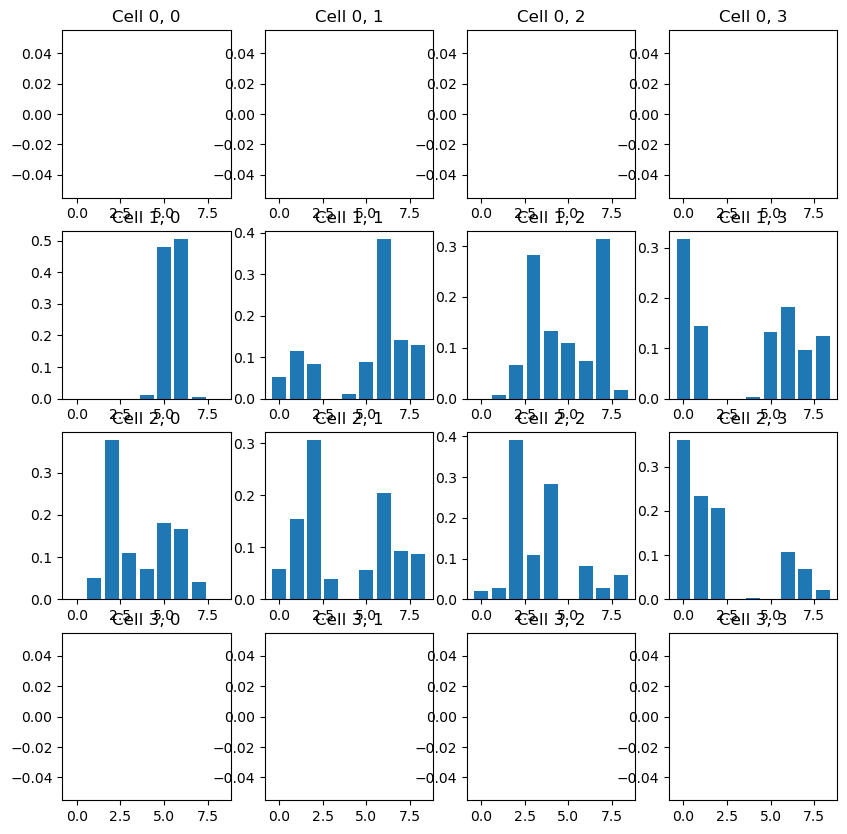

In [111]:
image = random.choice(train_fmnist_data)[0][0].numpy()
hog = compute_hog(image)

# draw cells on the image
plt.imshow(image)
for i in range(4):
    for j in range(4):
        plt.gca().add_patch(plt.Rectangle((j * cell_size, i * cell_size), cell_size, cell_size, fill=False, edgecolor='red', linewidth=1))
plt.show()


plt.figure(figsize=(10, 10))
for i in range(4):
    for j in range(4):
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.bar(range(len(hog[i, j])), hog[i, j])
        plt.title(f"Cell {i}, {j}")
plt.show()